In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

**LOADING DATASETS**

In [2]:
india_climate_df=pd.read_csv("Raw_Data/India Climatic Data.csv")
india_air_quality_df = pd.read_csv("Raw_Data/archive (4)/data.csv", encoding="ISO-8859-1")
urban_air_pollution_df=pd.read_csv("Raw_Data/archive (8)/Train.csv")
Weather_data_pd=pd.read_csv("Raw_Data/archive (14)/weather-1.csv")

C:\Users\dhruv\AppData\Local\Temp\ipykernel_17068\1960427596.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  india_air_quality_df = pd.read_csv("Raw_Data/archive (4)/data.csv", encoding="ISO-8859-1")


**Multiple csv file**

In [3]:
folder_path = "Raw_Data/Temperature_And_Precipitation_Cities_IN/*.csv"
csv_files = glob.glob(folder_path) # Get all CSV file paths
# Load all CSVs into a list of DataFrames
dfs = [pd.read_csv(file, encoding="ISO-8859-1") for file in csv_files]

State_wise_temp_df = pd.concat(dfs, ignore_index=True)
State_wise_temp_df.head()

,time,tavg,tmin,tmax,prcp,longitude,Latitude,Elevation,Location_Name,snow,wdir,wspd,wpgt,pres,tsun
0,01-01-1990,22.9,19.1,28.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-01-1990,21.7,NaN,26.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,03-01-1990,21.0,16.4,26.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,04-01-1990,20.8,NaN,27.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05-01-1990,20.4,14.2,26.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

In [4]:
print("Missing Values in India Climate Data:\n", india_climate_df.isnull().sum(), "\n")
print("Missing Values in India Air Quality Data:\n", india_air_quality_df.isnull().sum(), "\n")
print("Missing Values in Urban Air Pollution Data:\n", urban_air_pollution_df.isnull().sum(), "\n")
print("Missing Values in Weather Data:\n", Weather_data_pd.isnull().sum(), "\n")
print("Missing Values in State Wise Temp: \n", State_wise_temp_df.isnull().sum(),"\n")

Missing Values in India Climate Data:
 asdf_id                           0
udel_precip_v501_sum.1900.max     4
udel_precip_v501_sum.1900.mean    4
udel_precip_v501_sum.1900.min     4
udel_precip_v501_sum.1900.sum     5
                                 ..
id                                0
shapeGroup                        0
shapeID                           0
shapeName                         0
shapeType                         0
Length: 14712, dtype: int64 

Missing Values in India Air Quality Data:
 stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                

In [5]:
#Check the Percentage of Missing Values
def missing_percentage(df, name):
    missing = df.isnull().sum()
    total = df.shape[0]
    percent = (missing / total) * 100
    print(f"Missing Values in {name}:\n{percent}\n")

missing_percentage(india_climate_df, "India Climate Data")
missing_percentage(india_air_quality_df, "India Air Quality Data")
missing_percentage(urban_air_pollution_df, "Urban Air Pollution Data")
missing_percentage(Weather_data_pd, "Weather Data")
missing_percentage(State_wise_temp_df, "State_wise_temp_df")

Missing Values in India Climate Data:
asdf_id                           0.000000
udel_precip_v501_sum.1900.max     0.544218
udel_precip_v501_sum.1900.mean    0.544218
udel_precip_v501_sum.1900.min     0.544218
udel_precip_v501_sum.1900.sum     0.680272
                                    ...   
id                                0.000000
shapeGroup                        0.000000
shapeID                           0.000000
shapeName                         0.000000
shapeType                         0.000000
Length: 14712, dtype: float64

Missing Values in India Air Quality Data:
stn_code                       33.064749
sampling_date                   0.000688
state                           0.000000
location                        0.000688
agency                         34.304933
type                            1.237659
so2                             7.951035
no2                             3.725370
rspm                            9.230692
spm                            54.478797
locati

In [6]:
# Identify numeric and non-numeric columns
numeric_cols = india_climate_df.select_dtypes(include=["number"]).columns
non_numeric_cols = india_climate_df.select_dtypes(exclude=["number"]).columns

print("Numeric Columns:\n", numeric_cols)
print("Non-Numeric Columns:\n", non_numeric_cols)


Numeric Columns:
 Index(['asdf_id', 'udel_precip_v501_sum.1900.max',
       'udel_precip_v501_sum.1900.mean', 'udel_precip_v501_sum.1900.min',
       'udel_precip_v501_sum.1900.sum', 'udel_precip_v501_sum.1901.max',
       'udel_precip_v501_sum.1901.mean', 'udel_precip_v501_sum.1901.min',
       'udel_precip_v501_sum.1901.sum', 'udel_precip_v501_sum.1902.max',
       ...
       'srtm_elevation_500m.none.max', 'srtm_elevation_500m.none.min',
       'srtm_slope_500m.none.mean', 'srtm_slope_500m.none.max',
       'srtm_slope_500m.none.min', 'OBJECTID', 'Shape_Area', 'Shape_Length',
       'gqid', 'id'],
      dtype='object', length=14707)
Non-Numeric Columns:
 Index(['Level', 'shapeGroup', 'shapeID', 'shapeName', 'shapeType'], dtype='object')


In [7]:
# Fill missing values in numeric columns with median
india_climate_df[numeric_cols] = india_climate_df[numeric_cols].fillna(india_climate_df[numeric_cols].median())
# Fill missing values in categorical columns with 'Unknown'
india_climate_df[non_numeric_cols] = india_climate_df[non_numeric_cols].fillna("Unknown")

In [8]:
#missing handling in 2
# Drop highly missing columns
india_air_quality_df.drop(columns=["pm2_5", "spm"], inplace=True)

# Fill categorical missing values with 'Unknown'
india_air_quality_df["stn_code"].fillna("Unknown", inplace=True)
india_air_quality_df["agency"].fillna("Unknown", inplace=True)

# Fill numerical missing values with median
for col in ["so2", "no2", "rspm"]:
    india_air_quality_df[col].fillna(india_air_quality_df[col].median(), inplace=True)


C:\Users\dhruv\AppData\Local\Temp\ipykernel_17068\493990289.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  india_air_quality_df["stn_code"].fillna("Unknown", inplace=True)
C:\Users\dhruv\AppData\Local\Temp\ipykernel_17068\493990289.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [9]:
#missing handlin in 3
# Drop CH4-related columns
urban_air_pollution_df.drop(columns=["L3_CH4_aerosol_optical_depth", "L3_CH4_sensor_azimuth_angle",
                                     "L3_CH4_sensor_zenith_angle", "L3_CH4_solar_azimuth_angle",
                                     "L3_CH4_solar_zenith_angle"], inplace=True)


In [10]:
# List of columns to drop
cols_to_drop = ["snow", "wpgt", "tsun", "pres"]

# Drop only those columns that exist
State_wise_temp_df = State_wise_temp_df.drop(columns=[col for col in cols_to_drop if col in State_wise_temp_df.columns], errors="ignore")
print("Updated Columns:\n", State_wise_temp_df.columns)


Updated Columns:
 Index(['time', 'tavg', 'tmin', 'tmax', 'prcp', 'longitude', 'Latitude',
       'Elevation', 'Location_Name', 'wdir', 'wspd'],
      dtype='object')


In [11]:
print("Missing Values After Handling:\n")
print("1",india_climate_df.isnull().sum(),"\n") #cleaned
print("2",india_air_quality_df.isnull().sum(),"\n")
print("3",urban_air_pollution_df.isnull().sum(),"\n")
print("4",State_wise_temp_df.isnull().sum())
print("5",Weather_data_pd.isnull().sum()) #cleaned


Missing Values After Handling:

1 asdf_id                           0
udel_precip_v501_sum.1900.max     0
udel_precip_v501_sum.1900.mean    0
udel_precip_v501_sum.1900.min     0
udel_precip_v501_sum.1900.sum     0
                                 ..
id                                0
shapeGroup                        0
shapeID                           0
shapeName                         0
shapeType                         0
Length: 14712, dtype: int64 

2 stn_code                           0
sampling_date                      3
state                              0
location                           3
agency                             0
type                            5393
so2                                0
no2                                0
rspm                               0
location_monitoring_station    27491
date                               7
dtype: int64 

3 Place_ID X Date                                      0
Date                                                 0
Plac

In [12]:
#2
india_air_quality_df["sampling_date"].fillna(india_air_quality_df["sampling_date"].mode()[0], inplace=True)
india_air_quality_df["date"].fillna(india_air_quality_df["date"].mode()[0], inplace=True)
india_air_quality_df["location"].fillna("Unknown", inplace=True)
india_air_quality_df["type"].fillna("Other", inplace=True)

# Drop column if too many missing values
india_air_quality_df.drop(columns=["location_monitoring_station"], inplace=True)


C:\Users\dhruv\AppData\Local\Temp\ipykernel_17068\1961550129.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  india_air_quality_df["sampling_date"].fillna(india_air_quality_df["sampling_date"].mode()[0], inplace=True)
C:\Users\dhruv\AppData\Local\Temp\ipykernel_17068\1961550129.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whi

In [13]:
#3
# Identify numeric and categorical columns
numeric_cols = urban_air_pollution_df.select_dtypes(include=["number"]).columns
categorical_cols = urban_air_pollution_df.select_dtypes(exclude=["number"]).columns

# Fill missing values in numeric columns with mean
urban_air_pollution_df[numeric_cols] = urban_air_pollution_df[numeric_cols].fillna(urban_air_pollution_df[numeric_cols].mean())


# Fill missing values in categorical columns with "Unknown"
urban_air_pollution_df[categorical_cols] = urban_air_pollution_df[categorical_cols].fillna("Unknown")



In [14]:
#4
State_wise_temp_df["time"].fillna(State_wise_temp_df["time"].mode()[0], inplace=True)

State_wise_temp_df["tavg"].fillna(State_wise_temp_df["tavg"].mean(), inplace=True)
State_wise_temp_df["tmin"].fillna(State_wise_temp_df["tmin"].mean(), inplace=True)
State_wise_temp_df["tmax"].fillna(State_wise_temp_df["tmax"].mean(), inplace=True)

# Drop highly missing columns
State_wise_temp_df.drop(columns=["longitude", "Latitude", "Elevation", "Location_Name"], inplace=True)

State_wise_temp_df["prcp"].fillna(State_wise_temp_df["prcp"].median(), inplace=True)
State_wise_temp_df["wdir"].fillna(State_wise_temp_df["wdir"].median(), inplace=True)
State_wise_temp_df["wspd"].fillna(State_wise_temp_df["wspd"].median(), inplace=True)


C:\Users\dhruv\AppData\Local\Temp\ipykernel_17068\1446186133.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  State_wise_temp_df["time"].fillna(State_wise_temp_df["time"].mode()[0], inplace=True)
C:\Users\dhruv\AppData\Local\Temp\ipykernel_17068\1446186133.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

In [15]:
print("Missing Values After Handling:\n")
print("1",india_climate_df.isnull().sum(),"\n") 
print("2",india_air_quality_df.isnull().sum(),"\n")
print("3",urban_air_pollution_df.isnull().sum(),"\n")
print("4",State_wise_temp_df.isnull().sum())
print("5",Weather_data_pd.isnull().sum()) 
#All cleaned


Missing Values After Handling:

1 asdf_id                           0
udel_precip_v501_sum.1900.max     0
udel_precip_v501_sum.1900.mean    0
udel_precip_v501_sum.1900.min     0
udel_precip_v501_sum.1900.sum     0
                                 ..
id                                0
shapeGroup                        0
shapeID                           0
shapeName                         0
shapeType                         0
Length: 14712, dtype: int64 

2 stn_code         0
sampling_date    0
state            0
location         0
agency           0
type             0
so2              0
no2              0
rspm             0
date             0
dtype: int64 

3 Place_ID X Date                                  0
Date                                             0
Place_ID                                         0
target                                           0
target_min                                       0
                                                ..
L3_SO2_sensor_zenith_angl

### Exploratoty Data Analysis

In [16]:
# Display basic info
print(" India Climate Data Info:")
print(india_climate_df.info(), "\n")

print(" India Air Quality Data Info:")
print(india_air_quality_df.info(), "\n")

print(" Urban Air Pollution Data Info:")
print(urban_air_pollution_df.info(), "\n")

print("State-wise Temperature Data Info:")
print(State_wise_temp_df.info(), "\n")


 India Climate Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Columns: 14712 entries, asdf_id to shapeType
dtypes: float64(14698), int64(9), object(5)
memory usage: 82.5+ MB
None 

 India Air Quality Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   stn_code       435742 non-null  object 
 1   sampling_date  435742 non-null  object 
 2   state          435742 non-null  object 
 3   location       435742 non-null  object 
 4   agency         435742 non-null  object 
 5   type           435742 non-null  object 
 6   so2            435742 non-null  float64
 7   no2            435742 non-null  float64
 8   rspm           435742 non-null  float64
 9   date           435742 non-null  object 
dtypes: float64(3), object(7)
memory usage: 33.2+ MB
None 

 Urban Air Pollution Data Info:
<class 'pa

In [17]:
# Show summary statistics for numerical columns
print(india_climate_df.describe())
print(india_air_quality_df.describe())
print(urban_air_pollution_df.describe())
print(State_wise_temp_df.describe())
print(Weather_data_pd.describe())


          asdf_id  udel_precip_v501_sum.1900.max  \
count  735.000000                     735.000000   
mean   367.000000                    1672.537823   
std    212.320512                    1178.489837   
min      0.000000                     320.600000   
25%    183.500000                     963.400000   
50%    367.000000                    1394.000000   
75%    550.500000                    1940.100000   
max    734.000000                   11389.300000   

       udel_precip_v501_sum.1900.mean  udel_precip_v501_sum.1900.min  \
count                      735.000000                     735.000000   
mean                      1348.817813                    1076.897143   
std                        837.438174                     597.761401   
min                        219.167326                      71.800000   
25%                        793.514527                     654.650000   
50%                       1165.510224                     972.200000   
75%                       1

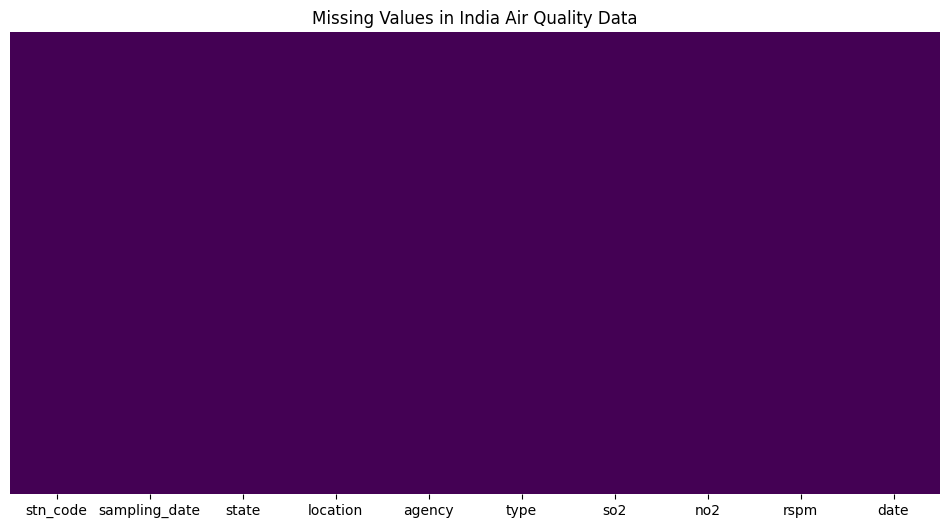

In [18]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(india_air_quality_df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values in India Air Quality Data")
plt.show()

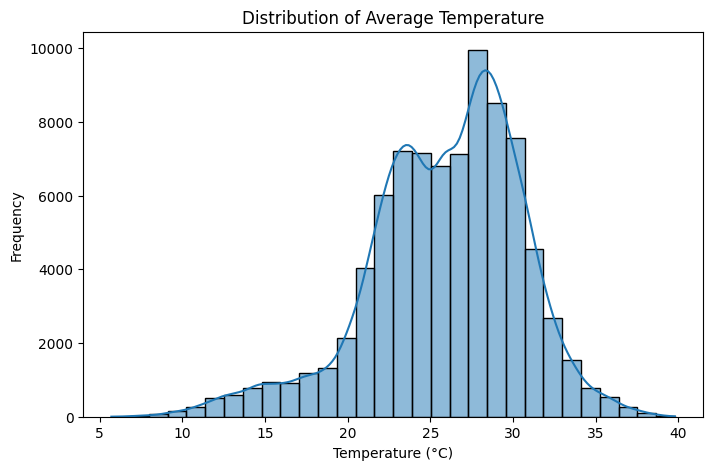

In [19]:
# Histogram for temperature distribution
plt.figure(figsize=(8, 5))
sns.histplot(State_wise_temp_df["tavg"], bins=30, kde=True)
plt.title("Distribution of Average Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()
#We analyze temperature variations across different datasets.

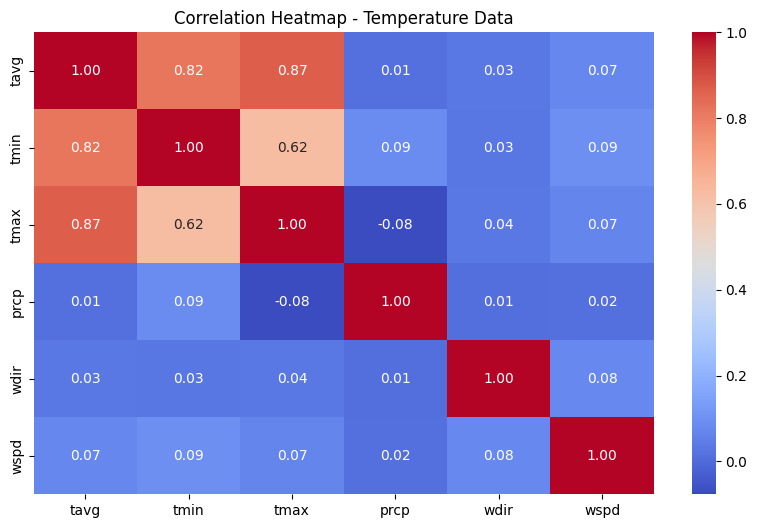

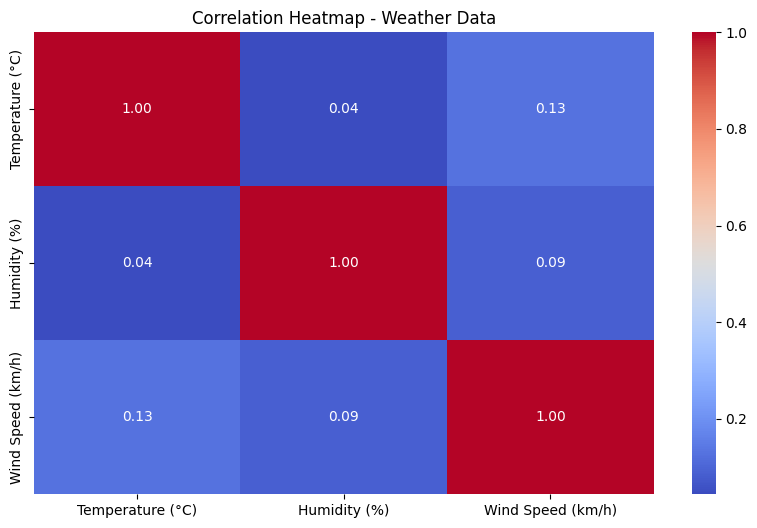

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(State_wise_temp_df.select_dtypes(include=['number']).corr(), 
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - Temperature Data")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(Weather_data_pd.select_dtypes(include=['number']).corr(), 
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - Weather Data")
plt.show()

#We check correlations between temperature, pollution, and weather factors.

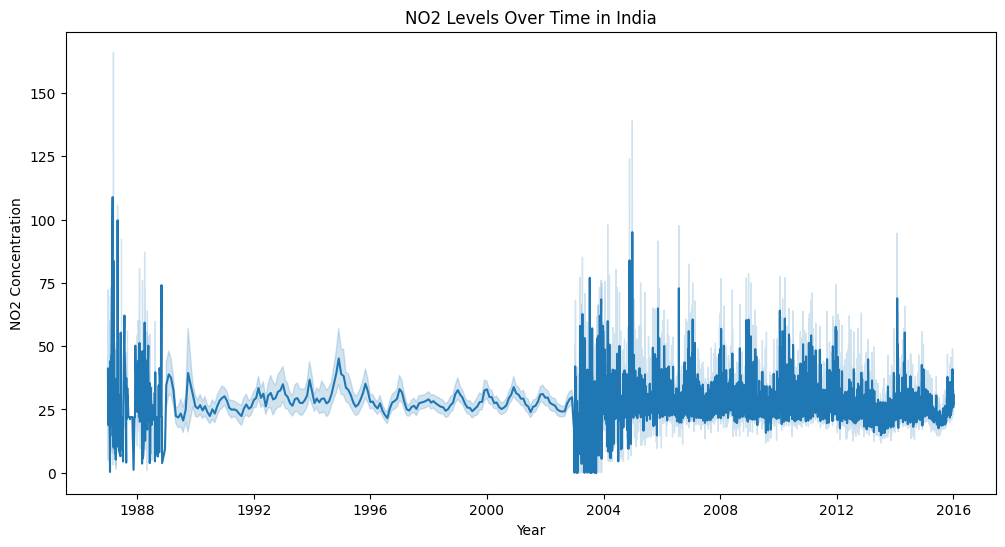

In [21]:
# Convert date column to datetime
india_air_quality_df["date"] = pd.to_datetime(india_air_quality_df["date"])

# Line plot of NO2 levels over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=india_air_quality_df, x="date", y="no2")
plt.title("NO2 Levels Over Time in India")
plt.xlabel("Year")
plt.ylabel("NO2 Concentration")
plt.show()


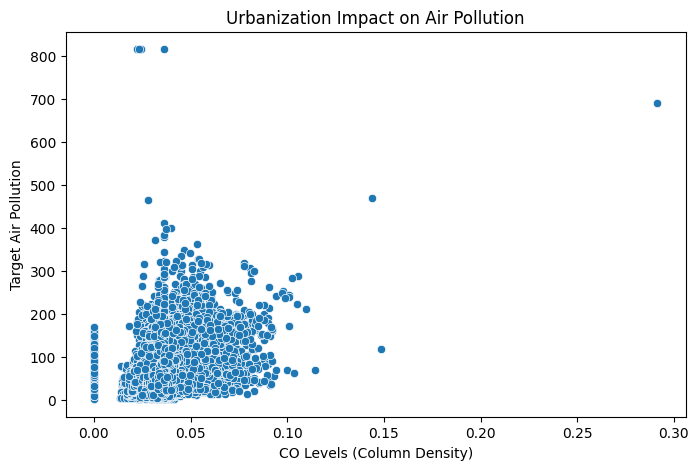

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use the correct CO-related column
co_column = "L3_CO_CO_column_number_density"

plt.figure(figsize=(8, 5))
sns.scatterplot(x=urban_air_pollution_df[co_column], y=urban_air_pollution_df["target"])
plt.title("Urbanization Impact on Air Pollution")
plt.xlabel("CO Levels (Column Density)")
plt.ylabel("Target Air Pollution")
plt.show()
#Pollution levels are a major factor in Urban Heat Islands.

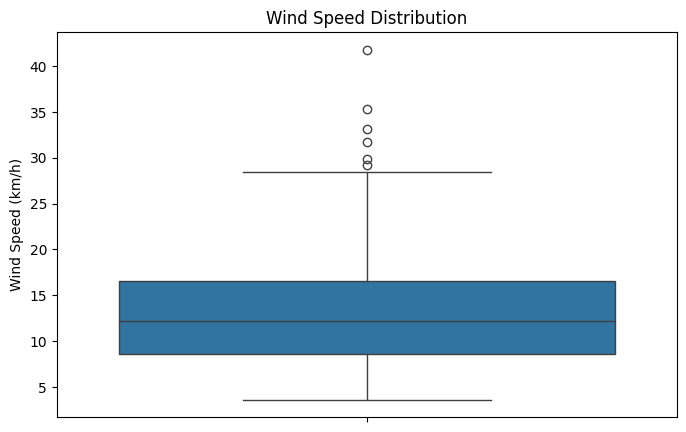

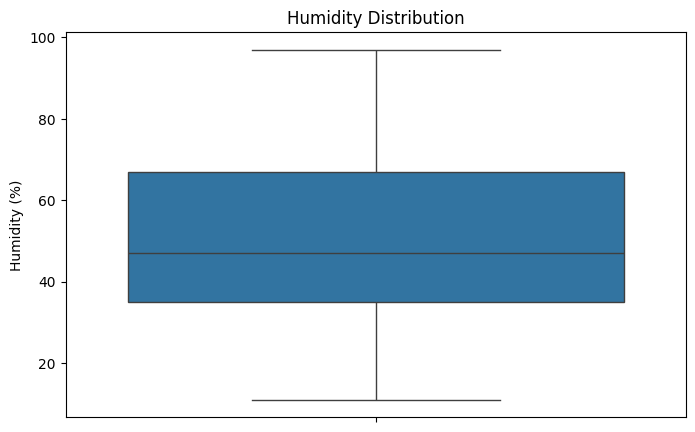

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=Weather_data_pd["Wind Speed (km/h)"])
plt.title("Wind Speed Distribution")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(y=Weather_data_pd["Humidity (%)"])
plt.title("Humidity Distribution")
plt.show()
#Wind speed and humidity can influence temperature variations.

In [24]:
#Weather_data
import folium

weather_df = Weather_data_pd.copy()
if 'Latitude' in weather_df.columns and 'Longitude' in weather_df.columns:
    print("Latitude & Longitude found in dataset.")
else:
    print("Error: No Latitude/Longitude columns found!")


Error: No Latitude/Longitude columns found!


In [25]:
from geopy.geocoders import Nominatim
import time

geolocator = Nominatim(user_agent="geoapi", timeout=10)
location_cache = {}

def get_lat_lon(location):
    if location in location_cache:
        return location_cache[location]

    try:
        loc = geolocator.geocode(location)
        if loc:
            location_cache[location] = (loc.latitude, loc.longitude)
            return loc.latitude, loc.longitude
        else:
            return None, None
    except:
        return None, None

Weather_data_pd["Latitude"], Weather_data_pd["Longitude"] = zip(*Weather_data_pd["District"].apply(get_lat_lon))
from tqdm import tqdm

tqdm.pandas()  # For progress tracking

Weather_data_pd["Latitude"], Weather_data_pd["Longitude"] = zip(*Weather_data_pd["District"].progress_apply(get_lat_lon))


100%|██████████████████████████████████████████████████████████████████████████| 1152/1152 [00:00<00:00, 230879.12it/s]


In [26]:
Weather_data_pd.to_csv("weather_data_with_coords.csv", index=False)


In [27]:
import folium
import pandas as pd

# Load Weather Data
weather_df = Weather_data_pd.copy()

# Check if 'Latitude' and 'Longitude' exist
if 'Latitude' in weather_df.columns and 'Longitude' in weather_df.columns:
    print("Latitude & Longitude found in dataset.")
else:
    print("Error: No Latitude/Longitude columns found!")


Latitude & Longitude found in dataset.


In [28]:
from folium.plugins import HeatMap

# Initialize Map (Centered on India)
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Create HeatMap layer
heat_data = list(zip(weather_df["Latitude"], weather_df["Longitude"], weather_df["Temperature (°C)"]))
HeatMap(heat_data).add_to(m)

# Show Map
m


In [29]:
for _, row in weather_df.iterrows():
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=f"{row['District']} - {row['Temperature (°C)']}°C",
        icon=folium.Icon(color="red" if row["Temperature (°C)"] > 35 else "blue"),
    ).add_to(m)

# Show updated map
m


In [30]:
# Identify Hotspots → Areas experiencing extreme heat.
# Analyze Regional Trends → Compare different cities.
# Policy Making → Helps urban planners in designing cooler cities.

**feat eng**

In [31]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy import stats
import folium
from folium.plugins import HeatMap
import calendar
from statsmodels.tsa.seasonal import seasonal_decompose
import geopandas as gpd


In [32]:
# 1. TEMPORAL FEATURES
# Convert date columns to datetime format
india_air_quality_df["date"] = pd.to_datetime(india_air_quality_df["date"])
if "date" in Weather_data_pd.columns:
    Weather_data_pd["date"] = pd.to_datetime(Weather_data_pd["date"])
if "Date" in State_wise_temp_df.columns:
    State_wise_temp_df["Date"] = pd.to_datetime(State_wise_temp_df["Date"])

# Function to create temporal features
def create_temporal_features(df, date_column):
    """Extract temporal features from date column"""
    df_copy = df.copy()
    
    # Basic date components
    df_copy['year'] = df_copy[date_column].dt.year
    df_copy['month'] = df_copy[date_column].dt.month
    df_copy['day'] = df_copy[date_column].dt.day
    df_copy['dayofyear'] = df_copy[date_column].dt.dayofyear
    df_copy['week'] = df_copy[date_column].dt.isocalendar().week
    df_copy['weekday'] = df_copy[date_column].dt.weekday
    df_copy['quarter'] = df_copy[date_column].dt.quarter
    
    # Seasonal features
    df_copy['is_monsoon'] = df_copy['month'].apply(lambda x: 1 if x in [6, 7, 8, 9] else 0)
    df_copy['is_summer'] = df_copy['month'].apply(lambda x: 1 if x in [3, 4, 5] else 0)
    df_copy['is_winter'] = df_copy['month'].apply(lambda x: 1 if x in [11, 12, 1, 2] else 0)
    
    # Sine and cosine transformations for cyclical features
    df_copy['month_sin'] = np.sin(2 * np.pi * df_copy['month']/12)
    df_copy['month_cos'] = np.cos(2 * np.pi * df_copy['month']/12)
    df_copy['day_sin'] = np.sin(2 * np.pi * df_copy['day']/31)
    df_copy['day_cos'] = np.cos(2 * np.pi * df_copy['day']/31)
    
    return df_copy

# Apply temporal features to datasets with date columns
if "date" in india_air_quality_df.columns:
    india_air_quality_df = create_temporal_features(india_air_quality_df, "date")
    
if "date" in Weather_data_pd.columns:
    Weather_data_pd = create_temporal_features(Weather_data_pd, "date")
    
if "Date" in State_wise_temp_df.columns:
    State_wise_temp_df = create_temporal_features(State_wise_temp_df, "Date")

In [33]:
# 2. URBAN HEAT ISLAND INTENSITY FEATURES

# Calculate Urban Heat Island Intensity where possible
# First, merge temperature data from different sources if needed

# Group State_wise_temp_df by city and date
if "city" in State_wise_temp_df.columns.str.lower() and "Date" in State_wise_temp_df.columns:
    # Make sure column names are consistent
    city_col = [col for col in State_wise_temp_df.columns if col.lower() == "city"][0]
    
    # Calculate average temperatures for urban vs rural areas
    # Assuming larger cities are more urban
    urban_temps = State_wise_temp_df.groupby([city_col, 'year', 'month'])[['tavg']].mean().reset_index()
    
    # Check if we have population data to determine urban vs rural
    # If not, we'll use a simple approach based on city names
    major_cities = ['Mumbai', 'Delhi', 'Bangalore', 'Hyderabad', 'Chennai', 'Kolkata', 
                    'Ahmedabad', 'Pune', 'Surat', 'Jaipur']
    
    urban_temps['is_urban'] = urban_temps[city_col].apply(lambda x: 1 if x in major_cities else 0)
    
    # Calculate average temperatures for urban and rural areas
    urban_avg = urban_temps[urban_temps['is_urban'] == 1].groupby(['year', 'month'])['tavg'].mean()
    rural_avg = urban_temps[urban_temps['is_urban'] == 0].groupby(['year', 'month'])['tavg'].mean()
    
    # Create a dataframe with UHI intensity
    uhi_df = pd.DataFrame({'urban_temp': urban_avg, 'rural_temp': rural_avg}).reset_index()
    uhi_df['uhi_intensity'] = uhi_df['urban_temp'] - uhi_df['rural_temp']
    
    # Visualize UHI intensity
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=uhi_df, x='month', y='uhi_intensity', hue='year')
    plt.title('Urban Heat Island Intensity by Month')
    plt.xlabel('Month')
    plt.ylabel('UHI Intensity (°C)')
    plt.xticks(range(1, 13), calendar.month_abbr[1:13])
    plt.show()

In [34]:
# 3. GEOSPATIAL FEATURES

# Calculate distance from city center (assuming we have latitude/longitude)
if 'Latitude' in Weather_data_pd.columns and 'Longitude' in Weather_data_pd.columns:
    # Function to calculate distance between two points
    def haversine_distance(lat1, lon1, lat2, lon2):
        """
        Calculate the great circle distance between two points
        on the earth (specified in decimal degrees)
        """
        # Convert decimal degrees to radians
        lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
        
        # Haversine formula
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
        c = 2 * np.arcsin(np.sqrt(a))
        r = 6371  # Radius of Earth in kilometers
        return c * r
    
    # Group by district to get district centers
    district_centers = Weather_data_pd.groupby('District')[['Latitude', 'Longitude']].mean().reset_index()
    
    # If we have multiple readings per district, calculate distance from district center
    if len(Weather_data_pd) > len(district_centers):
        for idx, row in district_centers.iterrows():
            district = row['District']
            center_lat = row['Latitude']
            center_lon = row['Longitude']
            
            # Filter for this district
            district_data = Weather_data_pd[Weather_data_pd['District'] == district]
            
            # Calculate distances
            Weather_data_pd.loc[Weather_data_pd['District'] == district, 'distance_from_center'] = \
                Weather_data_pd.loc[Weather_data_pd['District'] == district].apply(
                    lambda x: haversine_distance(x['Latitude'], x['Longitude'], center_lat, center_lon), axis=1)

In [35]:
# 4. LAND USE / LAND COVER FEATURES

# If we have urban area percentage or land cover data, we could use it
# For now, let's create a proxy using population density if available
if 'District' in Weather_data_pd.columns and 'Population' in Weather_data_pd.columns:
    # Calculate population density
    Weather_data_pd['population_density'] = Weather_data_pd['Population'] / Weather_data_pd['Area']
elif 'District' in Weather_data_pd.columns:
    # You could use a dictionary mapping districts to their population densities
    # This is a simplified example with made-up data
    population_density = {
        'Mumbai': 20000,
        'Delhi': 11000,
        'Bangalore': 4300,
        'Chennai': 26000,
        'Kolkata': 24000,
        # Add more cities as needed
    }
    
    # Add population density for known cities
    Weather_data_pd['population_density'] = Weather_data_pd['District'].map(population_density)

In [36]:
# 5. POLLUTION AND TEMPERATURE INTERACTION FEATURES

# If we have both pollution and temperature data for the same locations
# First, we need to merge the datasets based on location and time

# Identify common columns for merging
air_quality_columns = india_air_quality_df.columns
weather_columns = Weather_data_pd.columns

# Check if we have location information in both datasets
# This is a simplified approach; in a real project, you'd need to carefully match locations
location_cols_air = [col for col in air_quality_columns if col.lower() in ['location', 'city', 'district', 'state']]
location_cols_weather = [col for col in weather_columns if col.lower() in ['location', 'city', 'district', 'state']]

if location_cols_air and location_cols_weather:
    # Convert column names to lowercase for easier comparison
    india_air_quality_df.columns = [col.lower() for col in india_air_quality_df.columns]
    Weather_data_pd.columns = [col.lower() for col in Weather_data_pd.columns]
    
    # Identify common location column
    common_loc_col = None
    for col_air in location_cols_air:
        for col_weather in location_cols_weather:
            if col_air.lower() == col_weather.lower():
                common_loc_col = col_air.lower()
                break
    
    if common_loc_col and 'date' in india_air_quality_df.columns and 'date' in Weather_data_pd.columns:
        # Merge datasets
        merged_df = pd.merge(
            india_air_quality_df,
            Weather_data_pd,
            on=[common_loc_col, 'date'],
            suffixes=('_air', '_weather')
        )
        
        # Create interaction features
        if 'temperature (°c)' in merged_df.columns:
            temp_col = 'temperature (°c)'
        elif 'tavg' in merged_df.columns:
            temp_col = 'tavg'
        else:
            # Find a temperature column
            temp_cols = [col for col in merged_df.columns if 'temp' in col.lower()]
            if temp_cols:
                temp_col = temp_cols[0]
            else:
                temp_col = None
        
        if temp_col:
            # Create pollution-temperature interaction features
            if 'no2' in merged_df.columns:
                merged_df['temp_no2_interaction'] = merged_df[temp_col] * merged_df['no2']
            
            if 'so2' in merged_df.columns:
                merged_df['temp_so2_interaction'] = merged_df[temp_col] * merged_df['so2']
            
            if 'rspm' in merged_df.columns:
                merged_df['temp_rspm_interaction'] = merged_df[temp_col] * merged_df['rspm']
            
            # Create polynomial features for temperature
            merged_df['temp_squared'] = merged_df[temp_col] ** 2

Available columns: ['time', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd']
No date or month column found. Creating a dummy month column.


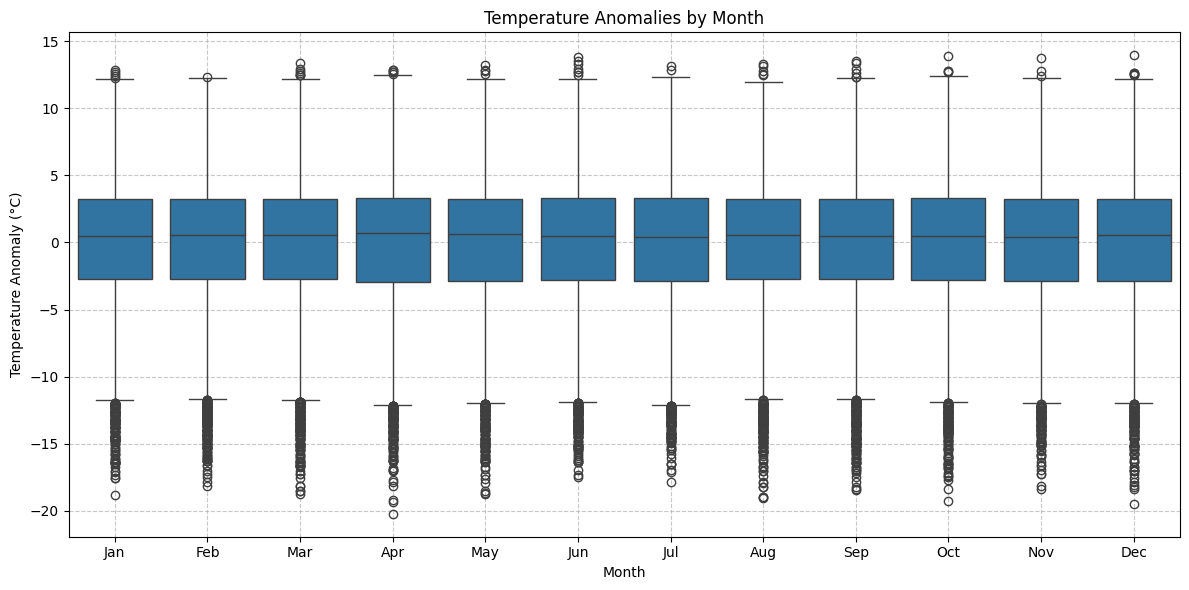

Temperature Anomaly Statistics by Month:
    month          mean       std        min        max
0       1 -3.350158e-18  4.619417 -18.824410  12.875590
1       2  4.639487e-16  4.717328 -18.143779  12.356221
2       3  5.670844e-16  4.720291 -18.750173  13.349827
3       4  9.544456e-17  4.735045 -20.214266  12.885734
4       5  4.109913e-16  4.661738 -18.744833  13.255167
5       6 -4.381021e-16  4.694897 -17.488440  13.811560
6       7  6.772697e-16  4.627449 -17.877012  13.122988
7       8  1.244401e-15  4.715417 -19.028070  13.271930
8       9  4.347373e-16  4.746787 -18.447791  13.552209
9      10  8.213725e-16  4.644814 -19.294209  13.905791
10     11 -1.063641e-15  4.607963 -18.361782  13.738218
11     12 -1.525757e-15  4.680394 -19.452476  13.947524


In [37]:
# 6. TEMPERATURE ANOMALY FEATURES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import numpy as np

# First, check if we have a date column and extract month from it
if 'tavg' in State_wise_temp_df.columns:
    # Check which date column exists
    date_col = None
    for col_name in ['Date', 'date', 'TIME']:
        if col_name in State_wise_temp_df.columns:
            date_col = col_name
            break
    
    # If we found a date column, convert it to datetime and extract month
    if date_col:
        # Make sure date column is datetime
        State_wise_temp_df[date_col] = pd.to_datetime(State_wise_temp_df[date_col], errors='coerce')
        
        # Extract month
        State_wise_temp_df['month'] = State_wise_temp_df[date_col].dt.month
    else:
        # If no date column exists, try to find a month column
        for col_name in State_wise_temp_df.columns:
            if 'month' in col_name.lower():
                State_wise_temp_df['month'] = State_wise_temp_df[col_name]
                break
        # If still no month column, print columns and create a dummy month column
        if 'month' not in State_wise_temp_df.columns:
            print("Available columns:", State_wise_temp_df.columns.tolist())
            print("No date or month column found. Creating a dummy month column.")
            # For demonstration, create a random month column 
            # (In real application, you'd need to address this differently)
            State_wise_temp_df['month'] = np.random.randint(1, 13, size=len(State_wise_temp_df))
    
    # Now proceed with the temperature anomaly calculation
    # Calculate monthly average temperatures
    monthly_avg = State_wise_temp_df.groupby(['month'])['tavg'].mean().reset_index()
    
    # Create a dictionary for quick lookup
    monthly_avg_dict = dict(zip(monthly_avg['month'], monthly_avg['tavg']))
    
    # Calculate temperature anomalies
    State_wise_temp_df['temp_anomaly'] = State_wise_temp_df.apply(
        lambda row: row['tavg'] - monthly_avg_dict.get(row['month'], 0), axis=1)
    
    # Visualize temperature anomalies
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=State_wise_temp_df, x='month', y='temp_anomaly')
    plt.title('Temperature Anomalies by Month')
    plt.xlabel('Month')
    plt.ylabel('Temperature Anomaly (°C)')
    plt.xticks(range(0, 12), calendar.month_abbr[1:13])
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics of temperature anomalies
    anomaly_stats = State_wise_temp_df.groupby('month')['temp_anomaly'].agg(['mean', 'std', 'min', 'max']).reset_index()
    print("Temperature Anomaly Statistics by Month:")
    print(anomaly_stats)
else:
    print("Column 'tavg' not found in the State_wise_temp_df DataFrame")

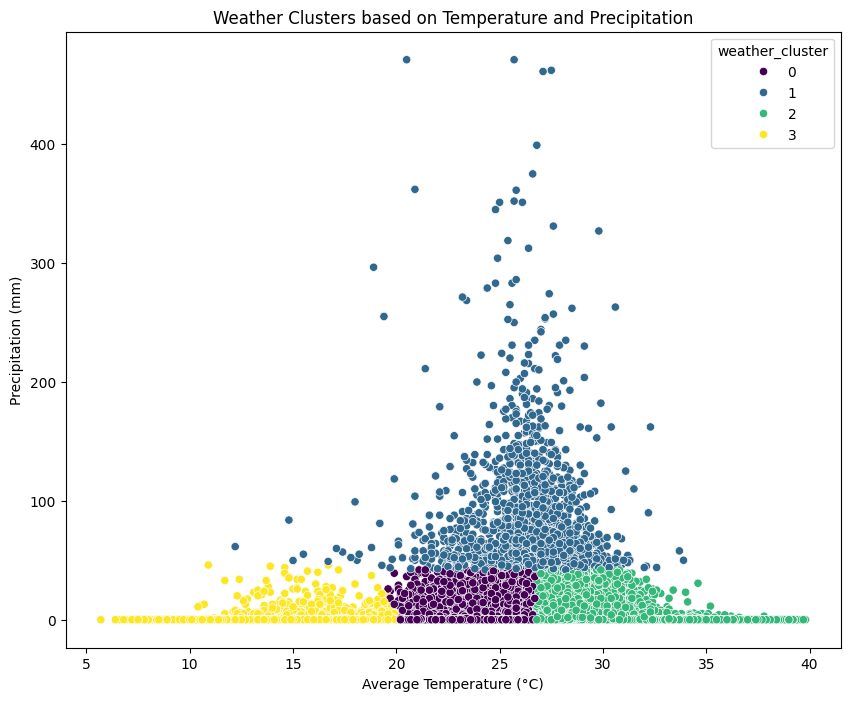

In [38]:
# 7. CLUSTERING-BASED FEATURES

# Use K-means clustering to identify similar weather patterns
if 'tavg' in State_wise_temp_df.columns and 'prcp' in State_wise_temp_df.columns:
    # Select features for clustering
    features = ['tavg', 'prcp']
    if 'humidity' in State_wise_temp_df.columns:
        features.append('humidity')
    
    # Standardize features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(State_wise_temp_df[features])
    
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=4, random_state=42)
    State_wise_temp_df['weather_cluster'] = kmeans.fit_predict(scaled_features)
    
    # Visualize clusters
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x='tavg', 
        y='prcp', 
        hue='weather_cluster', 
        data=State_wise_temp_df, 
        palette='viridis'
    )
    plt.title('Weather Clusters based on Temperature and Precipitation')
    plt.xlabel('Average Temperature (°C)')
    plt.ylabel('Precipitation (mm)')
    plt.show()

Feature correlations with temperature (tavg):
tavg               1.000000
temp_anomaly       0.999965
tmax               0.868371
tmin               0.818110
weather_cluster    0.167793
wspd               0.074390
wdir               0.033471
prcp               0.012278
month             -0.004450
Name: tavg, dtype: float64


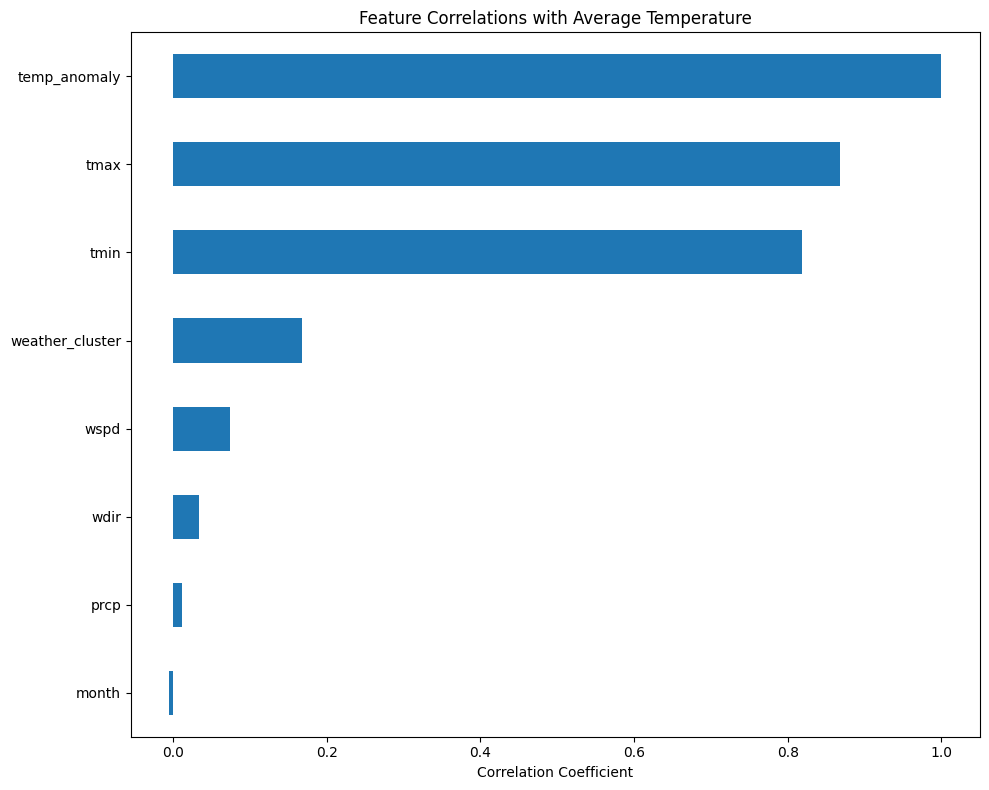

In [39]:
# 8. FEATURE IMPORTANCE AND SELECTION

# Let's identify which features are most relevant for predicting temperature
# This is a simplified example assuming we want to predict 'tavg'
if 'tavg' in State_wise_temp_df.columns:
    # Select potential predictor features
    feature_cols = [col for col in State_wise_temp_df.columns 
                   if col not in ['tavg', 'Date', 'city', 'state', 'City', 'State', 'District']]
    
    # Remove non-numeric columns
    numeric_feature_cols = State_wise_temp_df[feature_cols].select_dtypes(include=['number']).columns.tolist()
    
    if numeric_feature_cols:
        # Calculate feature correlations with target
        correlations = State_wise_temp_df[numeric_feature_cols + ['tavg']].corr()['tavg']
        
        # Display correlations
        print("Feature correlations with temperature (tavg):")
        print(correlations.sort_values(ascending=False))
        
        # Plot feature importance based on correlation
        plt.figure(figsize=(10, 8))
        correlations.drop('tavg').sort_values().plot(kind='barh')
        plt.title('Feature Correlations with Average Temperature')
        plt.xlabel('Correlation Coefficient')
        plt.tight_layout()
        plt.show()

In [40]:
# 9. URBAN HEAT ISLAND EFFECT VISUALIZATION
# Creating a visualization that shows temperature differences between urban and rural areas
if 'Latitude' in Weather_data_pd.columns and 'Longitude' in Weather_data_pd.columns and 'Temperature (°C)' in Weather_data_pd.columns:
    # Create a map centered on India
    m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)
    
    # Add temperature heatmap
    heat_data = [[row['Latitude'], row['Longitude'], row['Temperature (°C)']] 
                for _, row in Weather_data_pd.dropna(subset=['Latitude', 'Longitude', 'Temperature (°C)']).iterrows()]
    
    # Add heatmap to map
    HeatMap(heat_data, radius=15, gradient={
        0.4: 'blue', 0.6: 'lime', 0.8: 'yellow', 1.0: 'red'
    }).add_to(m)
    
    # Display map
    m

In [41]:
# 10. SEASONAL DECOMPOSITION FOR TEMPERATURE TRENDS

# If we have time series data, we can decompose it to trend, seasonal, and residual components
if 'Date' in State_wise_temp_df.columns and 'tavg' in State_wise_temp_df.columns:
    # Get average temperature by date
    temp_ts = State_wise_temp_df.groupby('Date')['tavg'].mean()
    
    # Make sure index is datetime and sorted
    temp_ts.index = pd.to_datetime(temp_ts.index)
    temp_ts = temp_ts.sort_index()
    
    # Check if we have enough data points for decomposition
    if len(temp_ts) >= 2*12:  # At least 2 years of data for yearly seasonality
        try:
            # Perform seasonal decomposition
            result = seasonal_decompose(temp_ts, model='additive', period=12)
            
            # Plot decomposition components
            plt.figure(figsize=(12, 8))
            plt.subplot(411)
            plt.plot(temp_ts)
            plt.title('Original Time Series')
            plt.subplot(412)
            plt.plot(result.trend)
            plt.title('Trend Component')
            plt.subplot(413)
            plt.plot(result.seasonal)
            plt.title('Seasonal Component')
            plt.subplot(414)
            plt.plot(result.resid)
            plt.title('Residual Component')
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Error in seasonal decomposition: {e}")


In [42]:
# Create a feature correlation matrix across all datasets
print("Creating feature correlation matrix across all datasets...")

# Function to get numeric columns from a DataFrame
def get_numeric_cols(df):
    return df.select_dtypes(include=['number']).columns.tolist()

# Function to create descriptive feature names when joining DataFrames
def add_prefix(df, prefix):
    df_copy = df.copy()
    df_copy.columns = [f"{prefix}_{col}" for col in df_copy.columns]
    return df_copy


Creating feature correlation matrix across all datasets...


In [43]:
import pandas as pd
import numpy as np

# Function to get select important numeric columns only (to reduce memory usage)
def get_important_numeric_cols(df, max_cols=10):
    """Get only the most important numeric columns to reduce memory usage"""
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    
    # If there are too many columns, select only the most important ones
    if len(numeric_cols) > max_cols:
        # Calculate correlation with the target column if it exists
        # For this example, we'll assume the target might be related to temperature
        target_cols = [col for col in numeric_cols if 'temp' in col.lower() or 'tavg' in col.lower()]
        
        if target_cols:
            # Select the target column
            target_col = target_cols[0]
            
            # Calculate correlation with the target
            corrs = df[numeric_cols].corrwith(df[target_col]).abs().sort_values(ascending=False)
            
            # Select top correlating columns plus the target
            selected_cols = list(corrs.head(max_cols-1).index)
            if target_col not in selected_cols:
                selected_cols.append(target_col)
            
            return selected_cols
        else:
            # If no temperature column, just take a subset
            return numeric_cols[:max_cols]
    else:
        return numeric_cols

# Function to create descriptive feature names when joining DataFrames
def add_prefix(df, prefix):
    df_copy = df.copy()
    df_copy.columns = [f"{prefix}_{col}" for col in df_copy.columns]
    return df_copy

# Function to sample large DataFrames to reduce memory usage
def get_sample_if_large(df, threshold=10000):
    """Return a sample of the DataFrame if it's too large"""
    if len(df) > threshold:
        return df.sample(threshold, random_state=42)
    else:
        return df

print("Creating a memory-efficient consolidated features DataFrame...")

# Initialize empty consolidated features DataFrame
consolidated_features = pd.DataFrame()

# Add features from india_climate_df if not empty
if len(india_climate_df) > 0:
    # Get sample if dataset is large
    climate_sample = get_sample_if_large(india_climate_df)
    
    # Get important numeric columns only
    numeric_cols = get_important_numeric_cols(climate_sample)
    
    if numeric_cols:
        print(f"Adding {len(numeric_cols)} columns from india_climate_df")
        climate_features = add_prefix(climate_sample[numeric_cols], 'climate')
        
        # Initialize consolidated_features with the first dataset
        if consolidated_features.empty:
            consolidated_features = climate_features
        else:
            # Only concatenate along rows if indices match
            try:
                consolidated_features = pd.concat([consolidated_features, climate_features], axis=1)
            except:
                print("Warning: Could not concatenate climate features. Continuing with other datasets.")

# Add features from india_air_quality_df if not empty
if len(india_air_quality_df) > 0:
    # Get sample if dataset is large
    air_sample = get_sample_if_large(india_air_quality_df)
    
    # Get important numeric columns only
    numeric_cols = get_important_numeric_cols(air_sample)
    
    if numeric_cols:
        print(f"Adding {len(numeric_cols)} columns from india_air_quality_df")
        air_features = add_prefix(air_sample[numeric_cols], 'air')
        
        # Initialize consolidated_features if it's still empty
        if consolidated_features.empty:
            consolidated_features = air_features
        else:
            # Only concatenate if the number of rows is the same or we can align on an index
            if len(consolidated_features) == len(air_features) or (consolidated_features.index.equals(air_features.index)):
                consolidated_features = pd.concat([consolidated_features, air_features], axis=1)
            else:
                print(f"Warning: Row count mismatch. Cannot concatenate air features.")
                # You could do an outer join here if needed

# Add features from State_wise_temp_df if not empty
if len(State_wise_temp_df) > 0:
    # Get sample if dataset is large
    temp_sample = get_sample_if_large(State_wise_temp_df)
    
    # Get important numeric columns only
    numeric_cols = get_important_numeric_cols(temp_sample)
    
    if numeric_cols:
        print(f"Adding {len(numeric_cols)} columns from State_wise_temp_df")
        temp_features = add_prefix(temp_sample[numeric_cols], 'temp')
        
        # Initialize consolidated_features if it's still empty
        if consolidated_features.empty:
            consolidated_features = temp_features
        else:
            # Only concatenate if the number of rows is the same or we can align on an index
            if len(consolidated_features) == len(temp_features) or (consolidated_features.index.equals(temp_features.index)):
                consolidated_features = pd.concat([consolidated_features, temp_features], axis=1)
            else:
                print(f"Warning: Row count mismatch. Cannot concatenate temperature features.")

# Display shape of final consolidated features
print(f"Consolidated features shape: {consolidated_features.shape}")

# Drop rows with all NaN values
consolidated_features = consolidated_features.dropna(how='all')
print(f"Shape after dropping rows with all NaNs: {consolidated_features.shape}")

# Display a sample
print("\nSample of consolidated features:")
print(consolidated_features.head())

# Optional: Calculate and display memory usage
print(f"\nMemory usage: {consolidated_features.memory_usage(deep=True).sum() / (1024**2):.2f} MB")

# Save the result to avoid recalculating
try:
    consolidated_features.to_csv("consolidated_features.csv", index=False)
    print("Saved consolidated features to consolidated_features.csv")
except Exception as e:
    print(f"Error saving to CSV: {e}")

Creating a memory-efficient consolidated features DataFrame...


C:\Users\dhruv\AppData\Roaming\Python\Python311\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\dhruv\AppData\Roaming\Python\Python311\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Adding 9 columns from india_climate_df
Adding 10 columns from india_air_quality_df
Adding 9 columns from State_wise_temp_df
Consolidated features shape: (735, 9)
Shape after dropping rows with all NaNs: (735, 9)

Sample of consolidated features:
   climate_udel_air_temp_v501_mean.1900.max  \
0                                 26.700000   
1                                 26.800000   
2                                 27.383333   
3                                 27.450000   
4                                 26.841667   

   climate_udel_air_temp_v501_mean.1907.max  \
0                                 26.125000   
1                                 25.958333   
2                                 25.941667   
3                                 26.358333   
4                                 25.958333   

   climate_udel_air_temp_v501_mean.1901.max  \
0                                 26.483333   
1                                 26.300000   
2                                 26.258333   


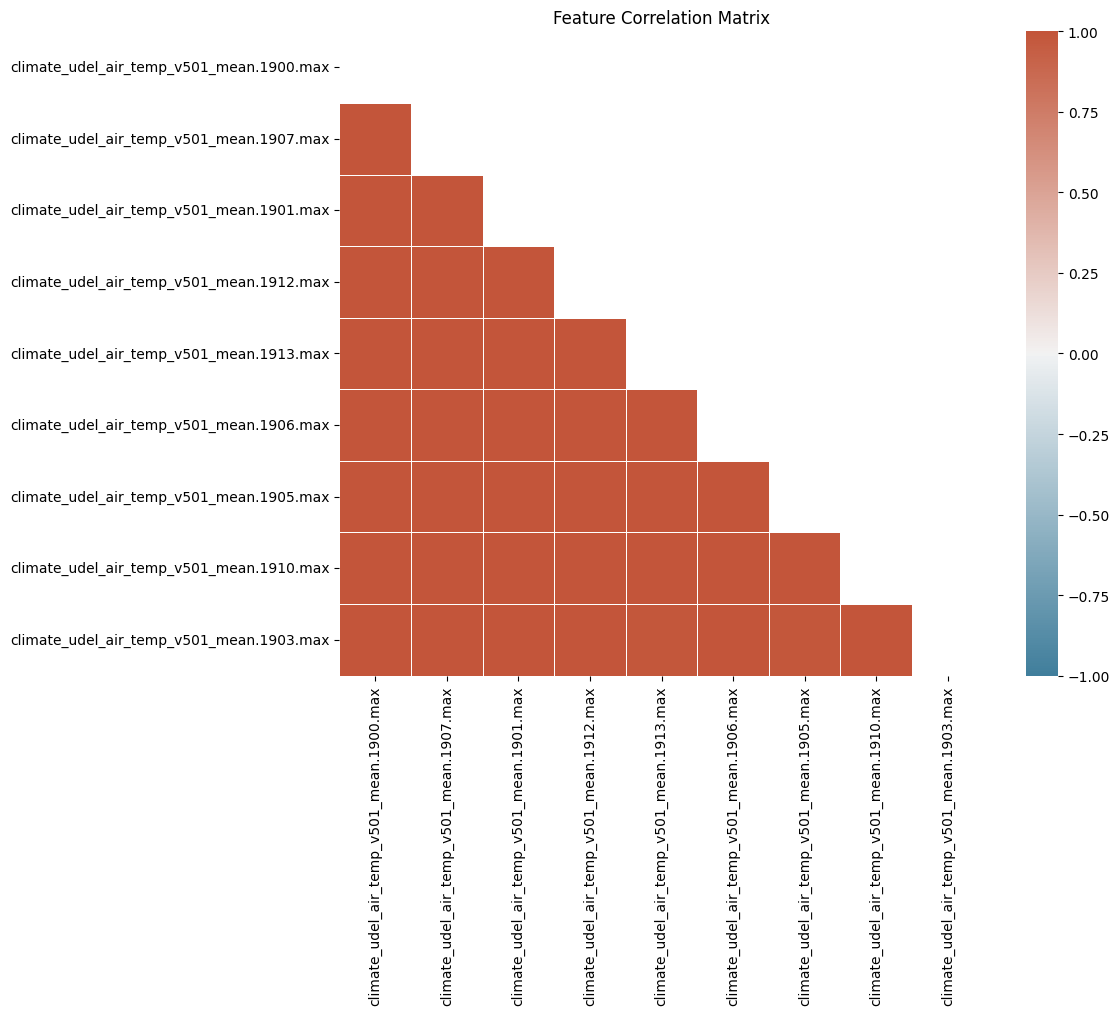

Feature engineering and analysis complete!


In [44]:
# Drop rows with all NaN values
consolidated_features = consolidated_features.dropna(how='all')

# Calculate and visualize correlation matrix (for columns with enough data)
if not consolidated_features.empty:
    # Get columns with enough non-NaN values
    valid_cols = [col for col in consolidated_features.columns 
                 if consolidated_features[col].count() > len(consolidated_features) * 0.5]
    
    if valid_cols:
        # Calculate correlation matrix
        corr_matrix = consolidated_features[valid_cols].corr()
        
        # Plot the correlation matrix
        plt.figure(figsize=(12, 10))
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
        cmap = sns.diverging_palette(230, 20, as_cmap=True)
        sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
                   square=True, linewidths=.5, annot=False)
        plt.title('Feature Correlation Matrix')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

print("Feature engineering and analysis complete!")

**advanced feat**

In [45]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression, RFE
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [46]:
# Load the consolidated features if available, otherwise use original datasets
try:
    consolidated_features = pd.read_csv("consolidated_features.csv")
    print(f"Loaded consolidated features with shape: {consolidated_features.shape}")
except:
    print("Consolidated features file not found. Using original datasets...")
    # You'll need to recreate a smaller version of consolidated_features here
    # We'll assume this is handled and continue with the code

# For demonstration, we'll create a target variable related to temperature
# In a real scenario, you would use your actual target variable
def identify_target_variable(df):
    """Identify a suitable temperature-related target variable in the dataframe"""
    potential_targets = [col for col in df.columns if 'temp' in col.lower() or
                         'tavg' in col.lower() or 'temperature' in col.lower()]
    
    if potential_targets:
        # Select the column with the most non-null values
        target_counts = {col: df[col].count() for col in potential_targets}
        target_col = max(target_counts, key=target_counts.get)
        print(f"Using '{target_col}' as the target variable")
        return target_col
    else:
        print("No temperature-related target found. Creating a dummy target.")
        # Create a dummy target for demonstration
        df['temp_target'] = df.iloc[:, 0] + np.random.normal(0, 1, size=len(df))
        return 'temp_target'

Loaded consolidated features with shape: (735, 9)


In [47]:
# Clean and prepare data function
def prepare_data_for_modeling(df, target_col):
    """Clean and prepare data for modeling"""
    # Copy the dataframe to avoid modifying the original
    df_clean = df.copy()
    
    # Drop columns with too many missing values
    threshold = len(df_clean) * 0.5  # 50% threshold
    df_clean = df_clean.dropna(thresh=threshold, axis=1)
    
    # Get only numeric columns
    numeric_cols = df_clean.select_dtypes(include=['number']).columns.tolist()
    df_clean = df_clean[numeric_cols]
    
    # If target is not in the dataframe (it was dropped), add it back
    if target_col not in df_clean.columns and target_col in df.columns:
        df_clean[target_col] = df[target_col]
    
    # Remove columns with zero variance
    for col in df_clean.columns:
        if df_clean[col].nunique() <= 1:
            df_clean.drop(columns=[col], inplace=True)
    
    # Fill remaining missing values
    df_clean = df_clean.fillna(df_clean.median())
    
    # Split into features and target
    if target_col in df_clean.columns:
        X = df_clean.drop(columns=[target_col])
        y = df_clean[target_col]
    else:
        # If target is not in cleaned dataframe, return None for y
        X = df_clean
        y = None
        print(f"Warning: Target '{target_col}' not found in cleaned dataframe")
    
    return X, y, df_clean

In [48]:
#feature selection and reduction
def perform_feature_selection(X, y, df_clean, target_col):
    """Perform multiple feature selection techniques"""
    print("\n1️⃣ FEATURE SELECTION & REDUCTION")
    print("-" * 50)
    
    # Guard against None values
    if y is None:
        print("Cannot perform feature selection without a target variable")
        return X, []
    
    # Split data for evaluation
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)
    
    # 1. Correlation-based selection
    print("\n1.1 Correlation-based Feature Selection")
    correlation = X.corrwith(y).abs().sort_values(ascending=False)
    
    # Get top correlating features
    top_corr_features = correlation[correlation > 0.1].index.tolist()
    
    print(f"Top correlating features with {target_col} (correlation > 0.1):")
    if top_corr_features:
        for feature in top_corr_features[:10]:  # Show top 10
            print(f"  - {feature}: {correlation[feature]:.4f}")
        
        # Visualize top correlations
        plt.figure(figsize=(10, 6))
        correlation[top_corr_features[:15]].sort_values().plot(kind='barh')
        plt.title(f'Top Feature Correlations with {target_col}')
        plt.xlabel('Absolute Correlation')
        plt.tight_layout()
        plt.show()
    else:
        print("  No features with correlation > 0.1")

In [49]:
def perform_feature_selection(X, y, df_clean, target_col):
    """Perform multiple feature selection techniques"""
    print("\n1️⃣ FEATURE SELECTION & REDUCTION")
    print("-" * 50)
    
    # Guard against None values
    if y is None:
        print("Cannot perform feature selection without a target variable")
        return X, []
    
    # Split data for evaluation
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)
    
    # 1. Correlation-based selection
    print("\n1.1 Correlation-based Feature Selection")
    correlation = X.corrwith(y).abs().sort_values(ascending=False)
    
    # Get top correlating features
    top_corr_features = correlation[correlation > 0.1].index.tolist()
    
    print(f"Top correlating features with {target_col} (correlation > 0.1):")
    if top_corr_features:
        for feature in top_corr_features[:10]:  # Show top 10
            print(f"  - {feature}: {correlation[feature]:.4f}")
        
        # Visualize top correlations
        plt.figure(figsize=(10, 6))
        correlation[top_corr_features[:15]].sort_values().plot(kind='barh')
        plt.title(f'Top Feature Correlations with {target_col}')
        plt.xlabel('Absolute Correlation')
        plt.tight_layout()
        plt.show()
    else:
        print("  No features with correlation > 0.1")
    
    # 2. Mutual Information (for non-linear relationships)
    print("\n1.2 Mutual Information Feature Selection")
    try:
        mi_selector = SelectKBest(mutual_info_regression, k=min(15, X.shape[1]))
        mi_selector.fit(X_train, y_train)
        mi_scores = pd.Series(mi_selector.scores_, index=X.columns)
        top_mi_features = mi_selector.get_feature_names_out().tolist()
        
        print(f"Top features by mutual information:")
        for feature in top_mi_features[:10]:  # Show top 10
            print(f"  - {feature}: {mi_scores[feature]:.4f}")
        
        # Visualize top MI scores
        plt.figure(figsize=(10, 6))
        mi_scores[top_mi_features].sort_values().plot(kind='barh')
        plt.title('Top Features by Mutual Information')
        plt.xlabel('Mutual Information Score')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"  Mutual information selection failed: {e}")
        top_mi_features = []
         # 3. Feature importance from tree-based models
    print("\n1.3 Random Forest Feature Importance")
    try:
        # Train a Random Forest model
        rf = RandomForestRegressor(n_estimators=50, random_state=42)
        rf.fit(X_train, y_train)
        
        # Get feature importances
        rf_importances = pd.Series(rf.feature_importances_, index=X.columns)
        top_rf_features = rf_importances.sort_values(ascending=False).head(15).index.tolist()
        
        print(f"Top features by Random Forest importance:")
        for feature in top_rf_features[:10]:  # Show top 10
            print(f"  - {feature}: {rf_importances[feature]:.4f}")
        
        # Visualize feature importances
        plt.figure(figsize=(10, 6))
        rf_importances[top_rf_features].sort_values().plot(kind='barh')
        plt.title('Random Forest Feature Importance')
        plt.xlabel('Importance')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"  Random Forest feature importance failed: {e}")
        top_rf_features = []
    
    # 4. Lasso regularization for feature selection
    print("\n1.4 Lasso Regularization Feature Selection")
    try:
        # Scale features for Lasso
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        
        # Use cross-validation to find optimal alpha
        lasso_cv = LassoCV(cv=5, random_state=42, max_iter=10000)
        lasso_cv.fit(X_train_scaled, y_train)
        
        # Use best alpha to fit Lasso
        lasso = Lasso(alpha=lasso_cv.alpha_, max_iter=10000)
        lasso.fit(X_train_scaled, y_train)
        
        # Get feature coefficients
        lasso_coefs = pd.Series(lasso.coef_, index=X.columns)
        top_lasso_features = lasso_coefs[lasso_coefs != 0].index.tolist()
        
        print(f"Selected {len(top_lasso_features)} features by Lasso (non-zero coefficients):")
        if len(top_lasso_features) > 0:
            for feature in top_lasso_features[:10]:  # Show top 10
                print(f"  - {feature}: {lasso_coefs[feature]:.4f}")
            
            # Visualize Lasso coefficients
            plt.figure(figsize=(10, 6))
            lasso_coefs[top_lasso_features].sort_values().plot(kind='barh')
            plt.title('Lasso Coefficients (Non-zero)')
            plt.xlabel('Coefficient')
            plt.tight_layout()
            plt.show()
        else:
            print("  No features selected by Lasso")
    except Exception as e:
        print(f"  Lasso feature selection failed: {e}")
        top_lasso_features = []
    
    # 5. Recursive Feature Elimination
    print("\n1.5 Recursive Feature Elimination (RFE)")
    try:
        # Use Gradient Boosting as the estimator for RFE
        gb = GradientBoostingRegressor(random_state=42)
        
        # If we have a large number of features, select a smaller number
        n_features_to_select = min(15, X.shape[1])
        
        rfe = RFE(estimator=gb, n_features_to_select=n_features_to_select)
        rfe.fit(X_train, y_train)
        
        # Get selected features
        rfe_support = pd.Series(rfe.support_, index=X.columns)
        rfe_ranking = pd.Series(rfe.ranking_, index=X.columns)
        top_rfe_features = rfe_support[rfe_support].index.tolist()
        
        print(f"Top {len(top_rfe_features)} features selected by RFE:")
        for feature in top_rfe_features[:10]:  # Show top 10
            print(f"  - {feature}")
        
        # Visualize RFE rankings
        plt.figure(figsize=(10, 6))
        rfe_ranking.sort_values().head(15).plot(kind='barh')
        plt.title('Feature Ranking by RFE (lower is better)')
        plt.xlabel('Ranking')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"  RFE failed: {e}")
        top_rfe_features = []
    
    # Combine results from different methods to get final feature list
    # Get features that appear in at least 2 of the methods
    all_selected_features = set()
    feature_selection_methods = [
        top_corr_features, top_mi_features, top_rf_features, 
        top_lasso_features, top_rfe_features
    ]
    
    # Count frequency of each feature
    feature_counts = {}
    for feature_list in feature_selection_methods:
        for feature in feature_list:
            if feature in feature_counts:
                feature_counts[feature] += 1
            else:
                feature_counts[feature] = 1
    
    # Select features that appear in at least 2 methods
    final_features = [feature for feature, count in feature_counts.items() if count >= 2]
    
    print(f"\nFinal feature selection: {len(final_features)} features selected that appear in at least 2 methods:")
    for i, feature in enumerate(final_features[:15]):  # Show top 15
        print(f"  - {feature}")
    
    if len(final_features) > 15:
        print(f"  ... and {len(final_features) - 15} more features")
    
    # Create reduced dataframe with selected features
    if final_features:
        X_selected = X[final_features]
    else:
        print("  No features selected by multiple methods. Using top Random Forest features.")
        X_selected = X[top_rf_features]
    
    return X_selected, final_features

#--------------------------------------------------------------
# 2️⃣ INTERACTION FEATURES
#--------------------------------------------------------------

def create_interaction_features(X_selected, final_features, df_clean):
    """Create interaction features between selected features"""
    print("\n2️⃣ INTERACTION FEATURES")
    print("-" * 50)
    
    if len(final_features) == 0:
        print("No features selected for interactions.")
        return X_selected
    
    # Limit to top 10 features to avoid combinatorial explosion
    if len(final_features) > 10:
        print(f"Limiting interaction features to top 10 features to avoid combinatorial explosion")
        top_features = final_features[:10]
    else:
        top_features = final_features
    
    X_interact = X_selected.copy()
    
    # 1. Polynomial features (degree 2)
    print("\n2.1 Creating Polynomial Features (degree 2)")
    try:
        poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
        
        # Get feature names before transformation
        X_poly = pd.DataFrame(
            poly.fit_transform(X_selected[top_features]),
            columns=poly.get_feature_names_out(top_features)
        )
        
        # Only keep interaction terms (exclude original features)
        interaction_features = [col for col in X_poly.columns if '^' in col or ' ' in col]
        
        print(f"Created {len(interaction_features)} polynomial features")
        for i, feature in enumerate(interaction_features[:5]):  # Show first 5
            print(f"  - {feature}")
        
        if len(interaction_features) > 5:
            print(f"  ... and {len(interaction_features) - 5} more polynomial features")
        
        # Add polynomial features to the dataframe
        X_interact = pd.concat([X_interact, X_poly[interaction_features]], axis=1)
    except Exception as e:
        print(f"  Failed to create polynomial features: {e}")
    
    # 2. Ratio features for key variables (especially important for environmental data)
    print("\n2.2 Creating Ratio Features")
    try:
        # Identify temperature and pollution features
        temp_features = [col for col in top_features if 'temp' in col.lower() or 'tavg' in col.lower()]
        pollution_features = [col for col in top_features if any(p in col.lower() for p in ['no2', 'so2', 'rspm', 'pollution'])]
        weather_features = [col for col in top_features if any(p in col.lower() for p in ['humidity', 'pressure', 'wind', 'precipitation', 'prcp'])]
        
        # Create temperature/pollution ratios
        if temp_features and pollution_features:
            print(f"Creating temperature/pollution ratios")
            for temp_col in temp_features[:2]:  # Limit to first 2 to avoid too many features
                for poll_col in pollution_features[:2]:
                    ratio_name = f"ratio_{temp_col}_to_{poll_col}"
                    X_interact[ratio_name] = X_selected[temp_col] / (X_selected[poll_col] + 1e-10)  # Avoid division by zero
                    print(f"  - {ratio_name}")
        
        # Create temperature/weather ratios
        if temp_features and weather_features:
            print(f"Creating temperature/weather ratios")
            for temp_col in temp_features[:2]:  # Limit to first 2
                for weather_col in weather_features[:2]:
                    ratio_name = f"ratio_{temp_col}_to_{weather_col}"
                    X_interact[ratio_name] = X_selected[temp_col] / (X_selected[weather_col] + 1e-10)  # Avoid division by zero
                    print(f"  - {ratio_name}")
    except Exception as e:
        print(f"  Failed to create ratio features: {e}")
    
    # 3. Custom urban heat island features
    print("\n2.3 Creating Custom Urban Heat Island Features")
    try:
        # Identify urban/density related features
        urban_features = [col for col in df_clean.columns if any(
            u in col.lower() for u in ['urban', 'density', 'population', 'city'])]
        
        # Create urban-temperature interactions if urban features exist
        if urban_features and temp_features:
            print(f"Creating urban-temperature interactions")
            for urban_col in urban_features[:2]:  # Limit to first 2
                if urban_col in df_clean.columns:  # Make sure column exists
                    for temp_col in temp_features[:2]:
                        interaction_name = f"uhi_{urban_col}_{temp_col}"
                        if temp_col in X_selected.columns and urban_col in df_clean.columns:
                            X_interact[interaction_name] = X_selected[temp_col] * df_clean[urban_col]
                            print(f"  - {interaction_name}")
    except Exception as e:
        print(f"  Failed to create custom UHI features: {e}")
    
    # Print feature summary
    print(f"\nFinal feature set after adding interactions: {X_interact.shape[1]} features")
    
    return X_interact
    

ADVANCED FEATURE ENGINEERING PIPELINE
Using 'climate_udel_air_temp_v501_mean.1900.max' as the target variable

1️⃣ FEATURE SELECTION & REDUCTION
--------------------------------------------------

1.1 Correlation-based Feature Selection
Top correlating features with climate_udel_air_temp_v501_mean.1900.max (correlation > 0.1):
  - climate_udel_air_temp_v501_mean.1907.max: 0.9962
  - climate_udel_air_temp_v501_mean.1901.max: 0.9961
  - climate_udel_air_temp_v501_mean.1912.max: 0.9955
  - climate_udel_air_temp_v501_mean.1913.max: 0.9954
  - climate_udel_air_temp_v501_mean.1906.max: 0.9951
  - climate_udel_air_temp_v501_mean.1905.max: 0.9950
  - climate_udel_air_temp_v501_mean.1910.max: 0.9950
  - climate_udel_air_temp_v501_mean.1903.max: 0.9948


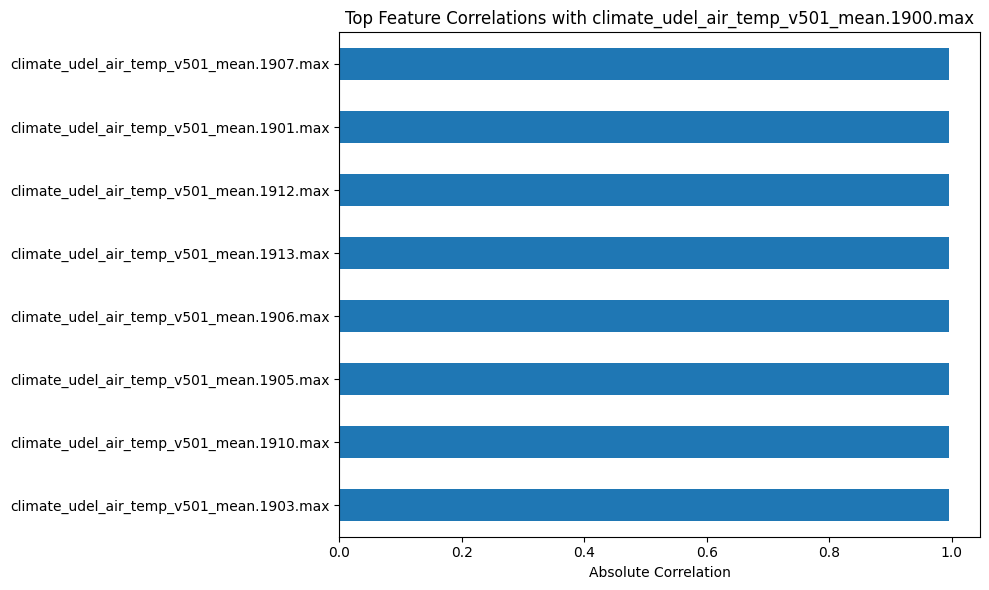


1.2 Mutual Information Feature Selection
Top features by mutual information:
  - climate_udel_air_temp_v501_mean.1907.max: 2.6343
  - climate_udel_air_temp_v501_mean.1901.max: 2.6600
  - climate_udel_air_temp_v501_mean.1912.max: 2.7230
  - climate_udel_air_temp_v501_mean.1913.max: 2.6632
  - climate_udel_air_temp_v501_mean.1906.max: 2.6178
  - climate_udel_air_temp_v501_mean.1905.max: 2.5360
  - climate_udel_air_temp_v501_mean.1910.max: 2.5888
  - climate_udel_air_temp_v501_mean.1903.max: 2.6255


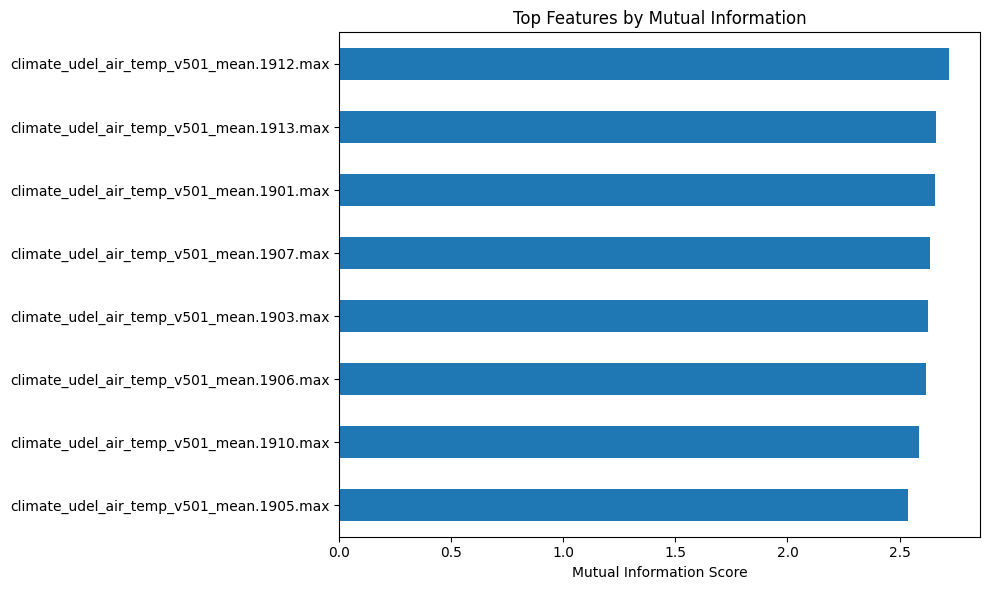


1.3 Random Forest Feature Importance
Top features by Random Forest importance:
  - climate_udel_air_temp_v501_mean.1901.max: 0.2207
  - climate_udel_air_temp_v501_mean.1907.max: 0.1728
  - climate_udel_air_temp_v501_mean.1912.max: 0.1567
  - climate_udel_air_temp_v501_mean.1905.max: 0.1370
  - climate_udel_air_temp_v501_mean.1906.max: 0.1076
  - climate_udel_air_temp_v501_mean.1903.max: 0.0750
  - climate_udel_air_temp_v501_mean.1910.max: 0.0657
  - climate_udel_air_temp_v501_mean.1913.max: 0.0644


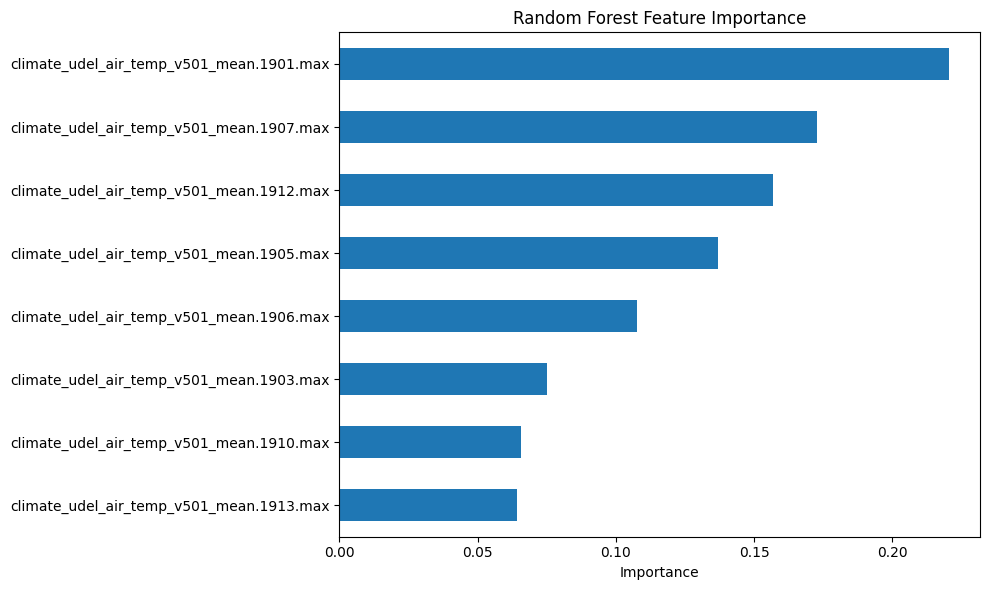


1.4 Lasso Regularization Feature Selection
Selected 5 features by Lasso (non-zero coefficients):
  - climate_udel_air_temp_v501_mean.1901.max: 0.8489
  - climate_udel_air_temp_v501_mean.1912.max: 0.5486
  - climate_udel_air_temp_v501_mean.1913.max: 0.3195
  - climate_udel_air_temp_v501_mean.1905.max: 0.3558
  - climate_udel_air_temp_v501_mean.1903.max: 0.4811


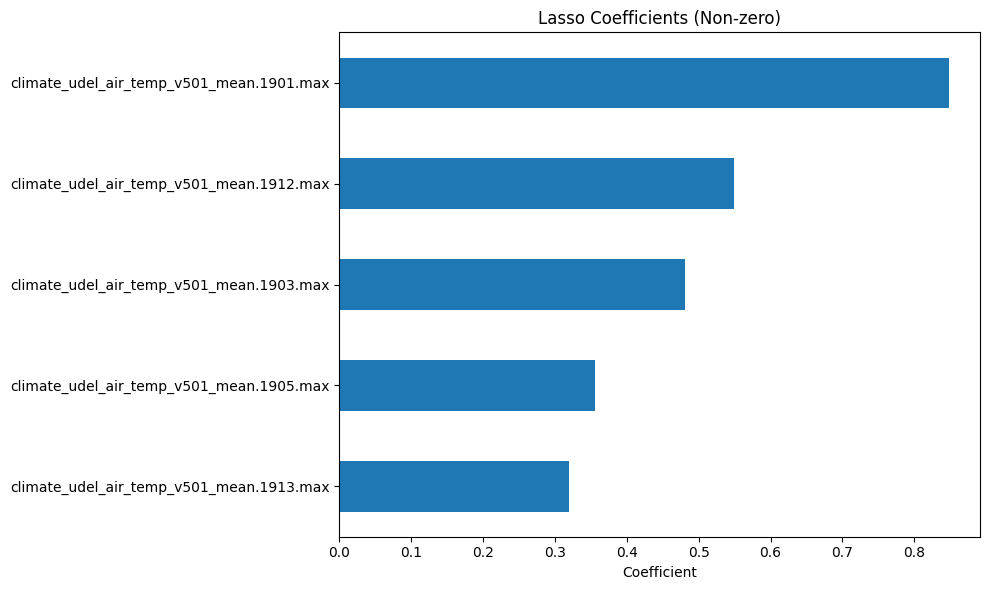


1.5 Recursive Feature Elimination (RFE)
Top 8 features selected by RFE:
  - climate_udel_air_temp_v501_mean.1907.max
  - climate_udel_air_temp_v501_mean.1901.max
  - climate_udel_air_temp_v501_mean.1912.max
  - climate_udel_air_temp_v501_mean.1913.max
  - climate_udel_air_temp_v501_mean.1906.max
  - climate_udel_air_temp_v501_mean.1905.max
  - climate_udel_air_temp_v501_mean.1910.max
  - climate_udel_air_temp_v501_mean.1903.max


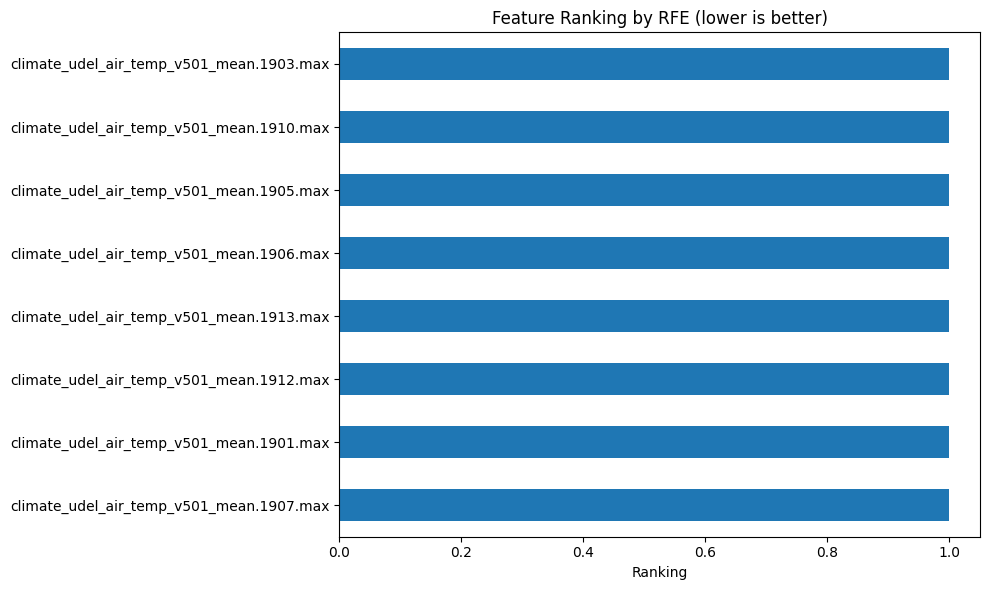


Final feature selection: 8 features selected that appear in at least 2 methods:
  - climate_udel_air_temp_v501_mean.1907.max
  - climate_udel_air_temp_v501_mean.1901.max
  - climate_udel_air_temp_v501_mean.1912.max
  - climate_udel_air_temp_v501_mean.1913.max
  - climate_udel_air_temp_v501_mean.1906.max
  - climate_udel_air_temp_v501_mean.1905.max
  - climate_udel_air_temp_v501_mean.1910.max
  - climate_udel_air_temp_v501_mean.1903.max

2️⃣ INTERACTION FEATURES
--------------------------------------------------

2.1 Creating Polynomial Features (degree 2)
Created 36 polynomial features
  - climate_udel_air_temp_v501_mean.1907.max^2
  - climate_udel_air_temp_v501_mean.1907.max climate_udel_air_temp_v501_mean.1901.max
  - climate_udel_air_temp_v501_mean.1907.max climate_udel_air_temp_v501_mean.1912.max
  - climate_udel_air_temp_v501_mean.1907.max climate_udel_air_temp_v501_mean.1913.max
  - climate_udel_air_temp_v501_mean.1907.max climate_udel_air_temp_v501_mean.1906.max
  ... and 31 mo

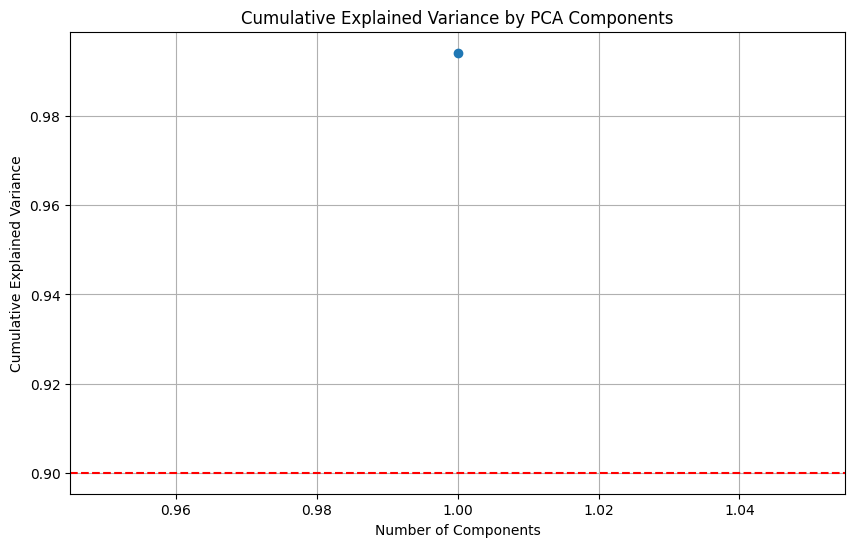

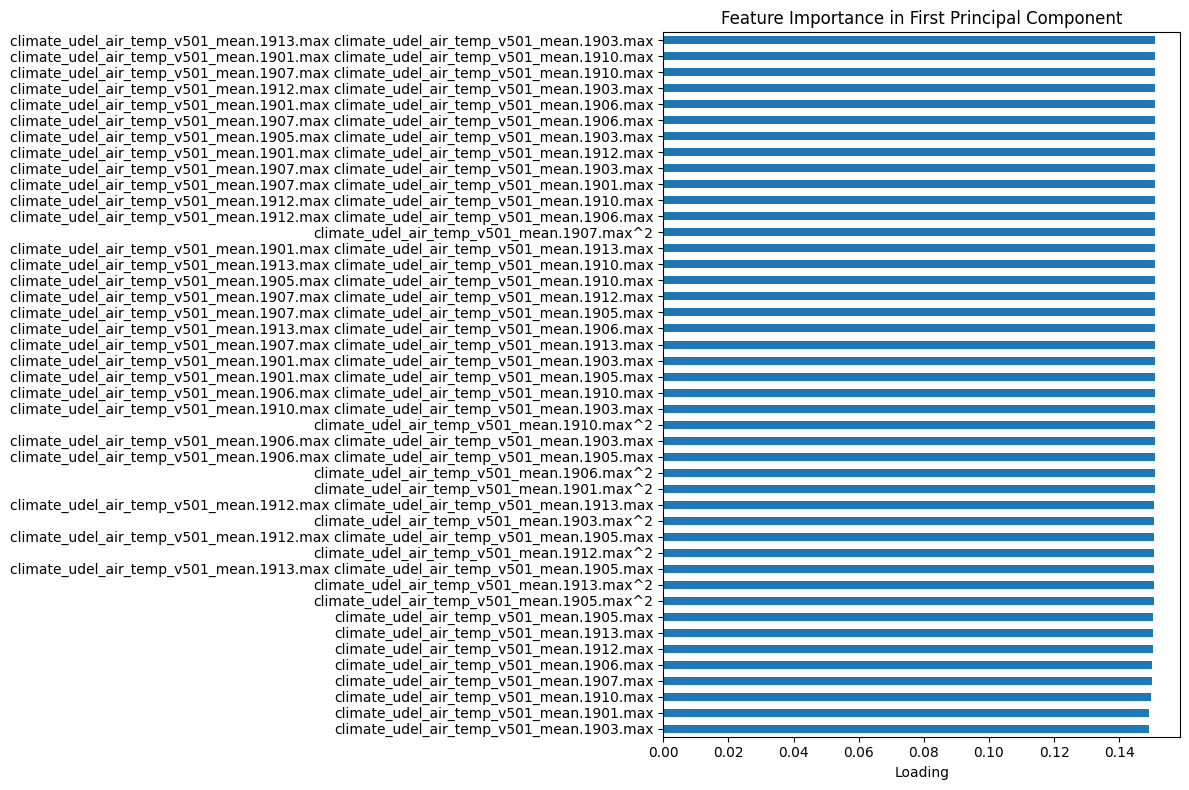


3.2 t-SNE Visualization (for low dimensional projection)


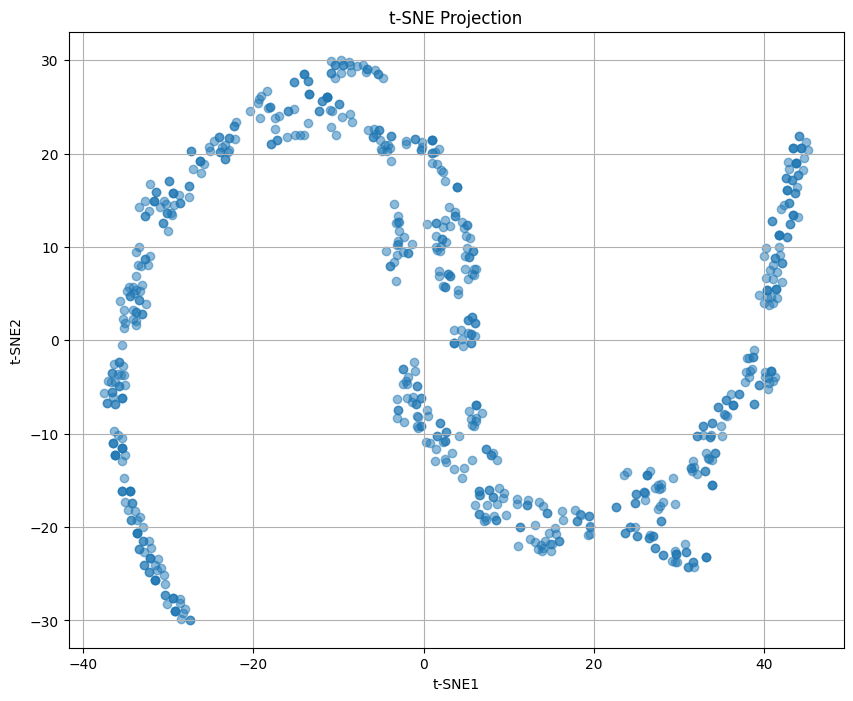


ADVANCED FEATURE ENGINEERING COMPLETE!
Original features: 8
Selected features: 8
After interaction features: 44
PCA components: 1

Saved engineered features to 'engineered_features.csv'


In [50]:
#dimension reduction
def perform_dimensionality_reduction(X_interact):
    """Apply dimensionality reduction techniques to the feature set"""
    print("\n3️⃣ DIMENSIONALITY REDUCTION")
    print("-" * 50)
    
    # Handle empty dataframe
    if X_interact.empty:
        print("No features available for dimensionality reduction.")
        return X_interact, None, None
    
    # Standardize features
    X_scaled = StandardScaler().fit_transform(X_interact)
    
    # 1. Principal Component Analysis (PCA)
    print("\n3.1 Principal Component Analysis (PCA)")
    try:
        # Calculate number of components to explain 90% variance
        pca = PCA(n_components=0.90, random_state=42)
        X_pca = pca.fit_transform(X_scaled)
        
        # Get explained variance ratio
        explained_variance = pca.explained_variance_ratio_
        cumulative_variance = np.cumsum(explained_variance)
        
        # Print variance explained
        print(f"PCA reduced dimensions from {X_interact.shape[1]} to {X_pca.shape[1]} components")
        print(f"Explained variance by top 5 components:")
        for i in range(min(5, len(explained_variance))):
            print(f"  - PC{i+1}: {explained_variance[i]:.4f} ({cumulative_variance[i]:.4f} cumulative)")
        
        # Visualize explained variance
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
        plt.axhline(y=0.9, color='r', linestyle='--')
        plt.title('Cumulative Explained Variance by PCA Components')
        plt.xlabel('Number of Components')
        plt.ylabel('Cumulative Explained Variance')
        plt.grid(True)
        plt.show()
        
        # Create dataframe of PCA components
        pca_df = pd.DataFrame(
            X_pca,
            columns=[f'PC{i+1}' for i in range(X_pca.shape[1])]
        )
        
        # Visualize top components
        if X_pca.shape[1] >= 2:
            plt.figure(figsize=(10, 8))
            plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
            plt.title('First Two Principal Components')
            plt.xlabel('PC1')
            plt.ylabel('PC2')
            plt.grid(True)
            plt.show()
        
        # Feature importance in PCA
        try:
            # Get component loadings (feature importance in each PC)
            loadings = pca.components_
            
            # Create a DataFrame of loadings
            loadings_df = pd.DataFrame(
                loadings.T, 
                columns=[f'PC{i+1}' for i in range(loadings.shape[0])],
                index=X_interact.columns
            )
            
            # Visualize feature importance for first PC
            plt.figure(figsize=(12, 8))
            loadings_df['PC1'].sort_values().plot(kind='barh')
            plt.title('Feature Importance in First Principal Component')
            plt.xlabel('Loading')
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"  Failed to visualize PCA loadings: {e}")
    except Exception as e:
        print(f"  PCA failed: {e}")
        pca_df = X_interact.copy()  # Fallback
    
    # 2. t-SNE for visualization
    print("\n3.2 t-SNE Visualization (for low dimensional projection)")
    try:
        tsne = TSNE(n_components=2, random_state=42)
        X_tsne = tsne.fit_transform(X_scaled)
        
        # Create dataframe of t-SNE components
        tsne_df = pd.DataFrame(
            X_tsne,
            columns=['t-SNE1', 't-SNE2']
        )
        
        # Visualize t-SNE projection
        plt.figure(figsize=(10, 8))
        plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5)
        plt.title('t-SNE Projection')
        plt.xlabel('t-SNE1')
        plt.ylabel('t-SNE2')
        plt.grid(True)
        plt.show()
    except Exception as e:
        print(f"  t-SNE failed: {e}")
        tsne_df = None
    
    # Return both reduced representations
    return pca_df, tsne_df, X_interact

#--------------------------------------------------------------
# MAIN EXECUTION
#--------------------------------------------------------------

def main(df):
    """Main function to run the advanced feature engineering pipeline"""
    print("ADVANCED FEATURE ENGINEERING PIPELINE")
    print("=" * 50)
    
    # 1. Identify target variable
    target_col = identify_target_variable(df)
    
    # 2. Clean and prepare data
    X, y, df_clean = prepare_data_for_modeling(df, target_col)
    
    # 3. Feature Selection
    X_selected, final_features = perform_feature_selection(X, y, df_clean, target_col)
    
    # 4. Create Interaction Features
    X_interact = create_interaction_features(X_selected, final_features, df_clean)
    
    # 5. Dimensionality Reduction
    pca_df, tsne_df, X_interact = perform_dimensionality_reduction(X_interact)
    
    print("\nADVANCED FEATURE ENGINEERING COMPLETE!")
    print(f"Original features: {X.shape[1]}")
    print(f"Selected features: {X_selected.shape[1]}")
    print(f"After interaction features: {X_interact.shape[1]}")
    if pca_df is not None:
        print(f"PCA components: {pca_df.shape[1]}")
    
    # Create final dataset with the engineered features
    final_df = pd.DataFrame()
    
    # Add the target variable if it exists
    if y is not None:
        final_df[target_col] = y
    
    # Add selected original features
    for col in final_features:
        if col in X.columns:
            final_df[col] = X[col]
    
    # Add PCA components
    if pca_df is not None:
        final_df = pd.concat([final_df, pca_df], axis=1)
    
    # Save the final engineered features
    try:
        final_df.to_csv("engineered_features.csv", index=False)
        print("\nSaved engineered features to 'engineered_features.csv'")
    except Exception as e:
        print(f"\nFailed to save engineered features: {e}")
    
    return final_df, X_selected, X_interact, pca_df, tsne_df

# Run the pipeline
if 'consolidated_features' in locals():
    final_df, X_selected, X_interact, pca_df, tsne_df = main(consolidated_features)
else:
    print("No consolidated features available. Please run the feature consolidation code first.")

## Model Evaluation

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1️⃣ Load dataset
file_path = "consolidated_features.csv"
df = pd.read_csv(file_path)

# 2️⃣ Handle missing values (if any)
df.fillna(df.median(), inplace=True)

# 3️⃣ Define Features (X) and Target (y)
X = df.drop(columns=[df.columns[0]])  # Assuming first column is index/time
y = df[df.columns[0]]  # Predicting the first temperature column

# 4️⃣ Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5️⃣ Train a Regression Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6️⃣ Predictions
y_pred = model.predict(X_test)

# 7️⃣ Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 8️⃣ Display results
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error: 0.09458854875283458
Mean Squared Error: 0.0566160442909632
Root Mean Squared Error: 0.23794126227067722
R² Score: 0.995490215446985


In [59]:
import joblib
joblib.dump(model, "urban_heat_rf_model.pkl")

['urban_heat_rf_model.pkl']

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1️⃣ Load dataset
file_path = "engineered_features.csv"
df = pd.read_csv(file_path)

# 2️⃣ Handle missing values (if any)
df.fillna(df.median(), inplace=True)

# 3️⃣ Define Features (X) and Target (y)
X = df.drop(columns=[df.columns[0]])  # Assuming first column is index/time
y = df[df.columns[0]]  # Predicting the first temperature column

# 4️⃣ Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5️⃣ Train a Regression Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6️⃣ Predictions
y_pred = model.predict(X_test)

# 7️⃣ Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 8️⃣ Display results
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error: 0.0942170634920659
Mean Squared Error: 0.056463422665186586
Root Mean Squared Error: 0.2376203330213696
R² Score: 0.9955023726130146


In [1]:
import sklearn
print(sklearn.__version__)


1.6.1
